In [21]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl
import pandas as pd
import numpy as np

# Figure 2b

In [7]:
df=pd.read_excel(r'df_Heusler_1134_exclude_La_Alk_not_magnetic.xlsx',index_col=0)

In [8]:
heat=np.zeros((40,40))
for i in df.index:
    eah=df.at[i,'E_above_hull']
    ef=df.at[i,'E_formation']
    i1=39-int(eah//(1/40))
    i2=39-int(abs(ef)//(1.25/40))
    heat[i1][i2]+=1

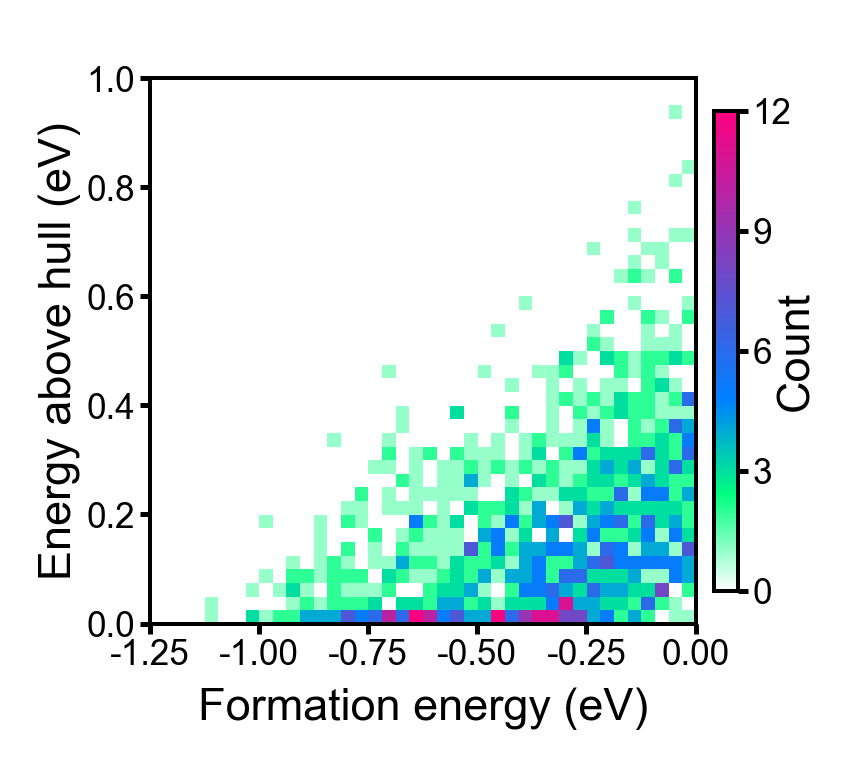

In [10]:
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(5.5/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax1=fig.add_axes([0.13,0.17,0.77,0.77])
ax1.tick_params(length=2,width=1,labelsize=7,pad=1)

im=plt.imshow(heat,cmap=mpl.colors.LinearSegmentedColormap.from_list('count',[(0,'w'),(0.2,'#00ff80'),(0.4,'#0080ff'),(1,'#ff0080')],N=256))

ax1.set_xticks([-0.5,7.5,15.5,23.5,31.5,39.5])
ax1.set_xticklabels(['-1.25','-1.00','-0.75','-0.50','-0.25','0.00'])
ax1.set_yticks([-0.5,7.5,15.5,23.5,31.5,39.5])
ax1.set_yticklabels(['1.0','0.8','0.6','0.4','0.2','0.0'])
ax1.set_xlabel('Formation energy (eV)',fontsize=9,labelpad=3)
ax1.set_ylabel('Energy above hull (eV)',fontsize=9,labelpad=1)

cbar=plt.colorbar(ticks=[0,3,6,9,12],fraction=0.04,pad=0.03)
cbar.ax.tick_params(labelsize=7,length=2,width=1,pad=1)
cbar.set_label('Count',fontsize=9,labelpad=-3)

plt.show()
# fig.savefig('Figure_2_b.tif',dpi=360)

# Figure 2c

In [12]:
dfa1=pd.read_csv(r'Train_data_5000.csv',index_col=0)
dfa2=pd.read_csv(r'Valid_data_500.csv',index_col=0)
dfa3=pd.read_csv(r'Test_data_500.csv',index_col=0)
dfa=pd.concat([dfa1,dfa2,dfa3])
dfa.reset_index(drop=True,inplace=True)

In [13]:
bins=np.arange(-4,4,0.1)
indices=np.digitize(dfa['Gads'],bins)
Bins_per_adsb=[[],[],[],[],[]]
for i in dfa.index:
    Bins_per_adsb[dfa.at[i,'Cadsb']].append(indices[i])
Counts_pre_adsb=[[],[],[],[],[]]
for i in range(5):
    for b in range(len(bins)):
        Counts_pre_adsb[i].append(Bins_per_adsb[i].count(b))
    Counts_pre_adsb[i]=np.array(Counts_pre_adsb[i])

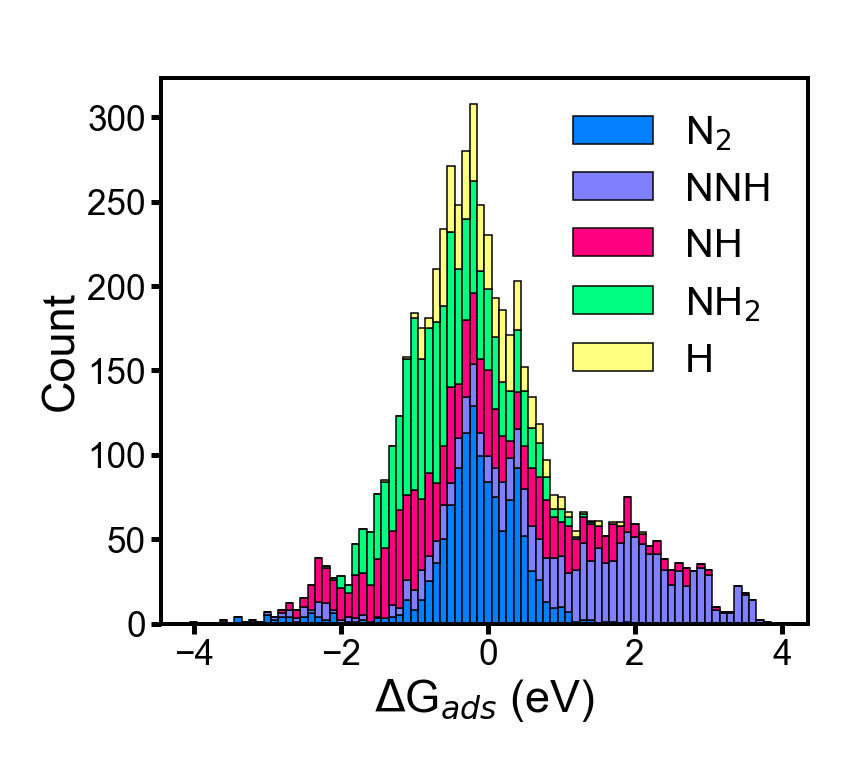

In [14]:
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(5.5/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax1=fig.add_axes([0.16,0.17,0.83,0.77])
ax1.tick_params(length=2,width=1,labelsize=7,pad=1)

width=80*0.1/len(bins)
lw=.3
ax1.bar(bins,Counts_pre_adsb[0],label='N$_2$',width=width,ec='k',color='#0080ff',lw=lw)
ax1.bar(bins,Counts_pre_adsb[1],bottom=Counts_pre_adsb[0],label='NNH',width=width,ec='k',color='#8080ff',lw=lw)
ax1.bar(bins,Counts_pre_adsb[2],bottom=np.sum(Counts_pre_adsb[:2],axis=0),label='NH',width=width,ec='k',color='#ff0080',lw=lw)
ax1.bar(bins,Counts_pre_adsb[3],bottom=np.sum(Counts_pre_adsb[:3],axis=0),label='NH$_2$',width=width,ec='k',color='#00ff80',lw=lw)
ax1.bar(bins,Counts_pre_adsb[4],bottom=np.sum(Counts_pre_adsb[:4],axis=0),label='H',width=width,ec='k',color='#ffff80',lw=lw)

ax1.set_xlabel('$\Delta$G$_{ads}$ (eV)',fontsize=9,labelpad=1)
ax1.set_ylabel('Count',fontsize=9,labelpad=1)

plt.legend(fontsize=8,edgecolor='none',facecolor='none')
plt.show()
# fig.savefig('Figure_2_c.tif',dpi=360)

# Figure 2d

In [22]:
Cadsb=Counter(dfa['Cadsb'].values)
Csite=Counter(dfa['Csite'].values)

In [23]:
Cadsb={'N$_2$':1251,'NNH':1330,'NH':1422,'NH$_2$':1445,'H':552}
Csite={'top':2360,'bridge':324,'4-fold':2786,'3-fold':530}

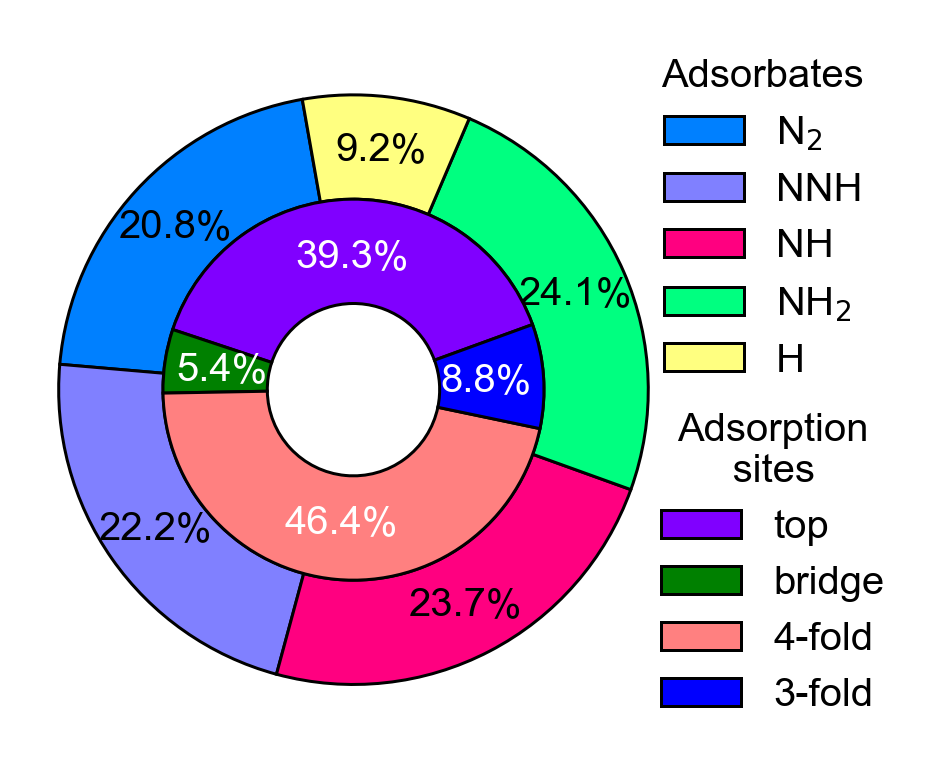

In [24]:
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(6/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)
ax1=fig.add_axes([0.04,0.1,0.6666666666666666,0.8])
ax1.patch.set_alpha(0.0)
ax2=fig.add_axes([0.04,0.1,0.66666666666,0.8])
ax2.patch.set_alpha(0.0)
patches1, texts1, autotexts1=ax1.pie(Cadsb.values(),radius=1.3,wedgeprops=dict(width=0.46,edgecolor='k',lw=0.6),colors=['#0080ff','#8080ff','#ff0080','#00ff80','#ffff80'],
       autopct="%1.1f%%",pctdistance=0.82,textprops={'fontsize':8,'color':'k','ha':'center'},startangle=100)#labels=Cadsb.keys(),labeldistance=1.08
patches2, texts2, autotexts2=ax2.pie(Csite.values(),radius=0.84,wedgeprops=dict(width=0.46,edgecolor='k',lw=0.6),colors=['#8000ff','#008000','#ff8080','#0000ff'],
       autopct="%1.1f%%",pctdistance=0.7,textprops={'fontsize':8,'color':'w','ha':'center'},startangle=20)#labels=Csite.keys(),labeldistance=0.25
ax1.legend(patches1,Cadsb.keys(),title='Adsorbates',fontsize=8,title_fontsize=8,loc=(1.015,0.49),edgecolor='none',facecolor='none')
ax2.legend(patches2,Csite.keys(),title='Adsorption\n     sites',fontsize=8,title_fontsize=8,loc=(1.015,-0.1),edgecolor='none',facecolor='none')

# fig.savefig('Figure_2_d.tif',dpi=360)